# Part I - (FordGobike-tripdata Exploration)
## by Julien Russo

## Introduction
The data set used here is the Ford Gobike tripdata exploration file. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
tripdata = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(tripdata.shape)
print(tripdata.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
print(tripdata['user_type'].value_counts())
print(tripdata['member_gender'].value_counts())
print(tripdata['bike_share_for_all_trip'].value_counts())
print(tripdata['start_station_id'].value_counts().shape[0])
print(tripdata['end_station_id'].value_counts().shape[0])
print(tripdata['bike_id'].value_counts().shape[0])

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64
Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64
No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64
329
329
4646


In [5]:
tripdata.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

There are 183,412 trips in the dataset with 16 features (duration in seconds, start and end time, start station id, name, latitude and longitude, end station id, name, latitude and longitude, the bike id, the user type, the member birth year and gender, and the bike share for all trip). The duration and coordinates are numerical values, and the other variables are mostly categorical data. 

Member gender : Male or Female
User Type : Customer or Subscriber

There are 329 stations

There are 4646 different bikes in the dataset

- the dayofweek derived from the date of the trip

The trips are all dated from february 2019


### What is/are the main feature(s) of interest in your dataset?

Since we don't have a long enough dataset in terms of date range (only one month) the focus will be more on a typical day. I will also look for any week pattern and check the users statistics

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the weekdays to be more busy than weekends. I am most interested in analysing the time of the trip, see if there is a big difference between rush hours and weekend for example and how we can use the info to modelise the number of bikes in use.

## Univariate charts

### Users statistics

> Let's explore the typical user of the bikes :

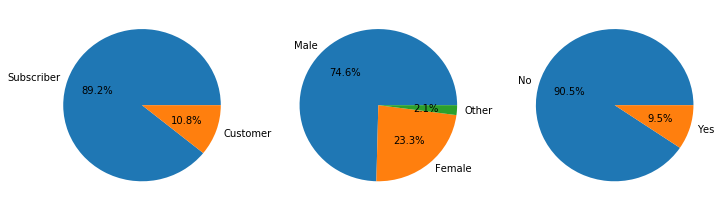

In [6]:
fig, ax = plt.subplots(figsize = (12, 3.5), ncols = 3)

plt.subplot(1, 3, 1)
plt.pie(tripdata['user_type'].value_counts(), labels = tripdata['user_type'].value_counts().index, autopct='%1.1f%%');

plt.subplot(1, 3, 2)
plt.pie(tripdata['member_gender'].value_counts(), labels = tripdata['member_gender'].value_counts().index, autopct='%1.1f%%');

plt.subplot(1, 3, 3)
plt.pie(tripdata['bike_share_for_all_trip'].value_counts(), labels = tripdata['bike_share_for_all_trip'].value_counts().index, autopct='%1.1f%%');


We can do the same analysis with the total distance :

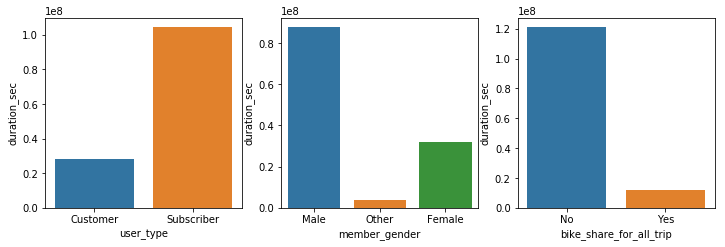

In [7]:
fig, ax = plt.subplots(figsize = (12, 3.5), ncols = 3)

plt.subplot(1, 3, 1)
sb.barplot(data=tripdata, x = 'user_type', y = 'duration_sec', estimator = sum, ci = None);

plt.subplot(1, 3, 2)
sb.barplot(data=tripdata, x = 'member_gender', y = 'duration_sec', estimator = sum, ci = None);

plt.subplot(1, 3, 3)
sb.barplot(data=tripdata, x = 'bike_share_for_all_trip', y = 'duration_sec', estimator = sum, ci = None);


There is a majority of subscriber vs customer, a majority of male users, and no bike share.

### Date analysis

Now in order to look at the distribution of the trips per day of the dataset. Let's start by creating the date_trip = date of the trip (extracted from the start_time field) and plot the number of trips per day

In [8]:
tripdata['trip_date'] = pd.to_datetime(tripdata['start_time'].str[:len('YYYY-MM-DD')])
tripdata.sort_values(by = 'trip_date', ascending = True, inplace = True)
tripdata['trip_date_label'] = tripdata['trip_date'].dt.strftime('%Y-%m-%d')
tripdata.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_date,trip_date_label
6551,702,2019-02-28 09:58:37.0760,2019-02-28 10:10:19.9750,115.0,Jackson Playground,37.765026,-122.398773,58.0,Market St at 10th St,37.776619,-122.417385,4767,Subscriber,1984.0,Male,No,2019-02-28,2019-02-28
6550,1081,2019-02-28 09:52:21.8900,2019-02-28 10:10:23.1870,127.0,Valencia St at 21st St,37.756708,-122.421025,27.0,Beale St at Harrison St,37.788059,-122.391865,5269,Subscriber,1989.0,Male,No,2019-02-28,2019-02-28
6549,1356,2019-02-28 09:47:48.2060,2019-02-28 10:10:25.1470,56.0,Koshland Park,37.773414,-122.427317,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,2993,Customer,1993.0,Female,No,2019-02-28,2019-02-28
6556,866,2019-02-28 09:55:24.8660,2019-02-28 10:09:51.5510,323.0,Broadway at Kearny,37.798014,-122.405950,321.0,5th St at Folsom,37.780146,-122.403071,6281,Subscriber,1990.0,Male,No,2019-02-28,2019-02-28
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,2019-02-28


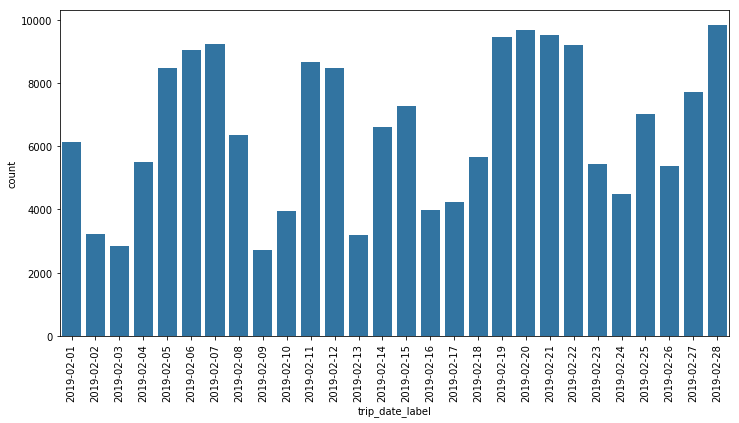

In [9]:
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(figsize = (12,6))
sb.countplot(data=tripdata, x = 'trip_date_label', color = base_color);
plt.xticks(rotation = 90);

There seems to be a difference between weekdays and weekends. Let's do the same graph but using the total duration per day

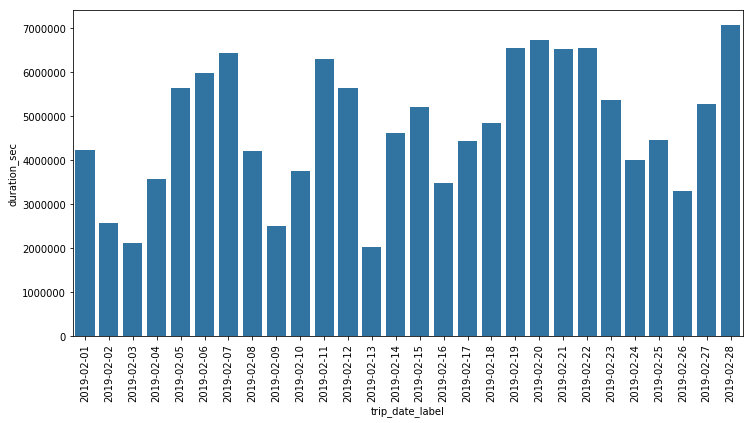

In [10]:
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(figsize = (12,6))
sb.barplot(data=tripdata, x = 'trip_date_label', y = 'duration_sec', estimator = sum, color = base_color, ci = None);
plt.xticks(rotation = 90);

Let's do the same graph but using the average duration per day

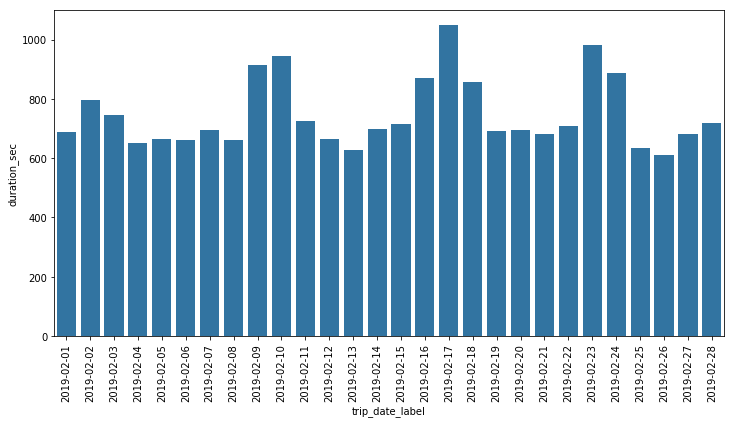

In [11]:
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(figsize = (12,6))
sb.barplot(data=tripdata, x = 'trip_date_label', y = 'duration_sec', color = base_color, ci=None);
plt.xticks(rotation = 90);

In all the previous graphs (number of trips, total distance, average distance) there seems to be a weekly pattern. We thus need to add the day of the week to combine the data

In [12]:
tripdata['dayofweek'] = tripdata['trip_date'].dt.dayofweek
tripdata.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_date,trip_date_label,dayofweek
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No,2019-02-01,2019-02-01,4
179316,245,2019-02-01 14:26:26.3700,2019-02-01 14:30:32.3180,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,245.0,Downtown Berkeley BART,37.870139,-122.268422,1984,Subscriber,1986.0,Male,No,2019-02-01,2019-02-01,4
179317,464,2019-02-01 14:22:02.5020,2019-02-01 14:29:47.2190,253.0,Haste St at College Ave,37.866418,-122.253799,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,3282,Subscriber,1987.0,Female,No,2019-02-01,2019-02-01,4
179318,604,2019-02-01 14:19:41.0930,2019-02-01 14:29:45.8840,104.0,4th St at 16th St,37.767045,-122.390833,61.0,Howard St at 8th St,37.776513,-122.411306,5575,Subscriber,1970.0,Male,No,2019-02-01,2019-02-01,4
179319,107,2019-02-01 14:27:38.6850,2019-02-01 14:29:25.9500,90.0,Townsend St at 7th St,37.771058,-122.402717,79.0,7th St at Brannan St,37.773492,-122.403673,3172,Subscriber,1992.0,Male,No,2019-02-01,2019-02-01,4


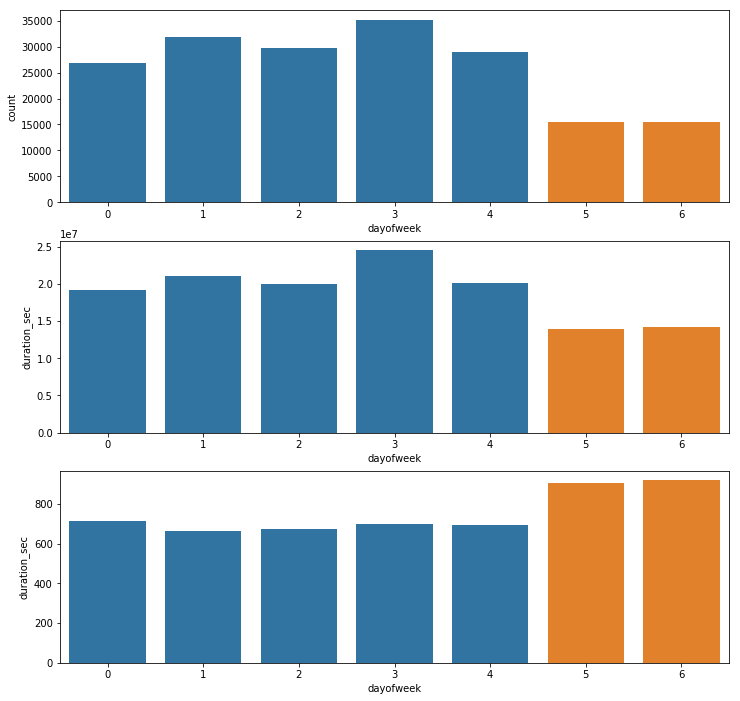

In [13]:
base_color = sb.color_palette()[0]
week_pal = [sb.color_palette()[0],sb.color_palette()[0], sb.color_palette()[0], sb.color_palette()[0], sb.color_palette()[0], sb.color_palette()[1], sb.color_palette()[1]]
fig, ax = plt.subplots(figsize = (12,12), nrows = 3)
plt.subplot(3, 1, 1)
sb.countplot(data=tripdata, x = 'dayofweek', palette = week_pal);
plt.subplot(3, 1, 2)
sb.barplot(data=tripdata, x = 'dayofweek', y = 'duration_sec', estimator = sum, ci = None, palette = week_pal);
plt.subplot(3, 1, 3)
sb.barplot(data=tripdata, x = 'dayofweek', y = 'duration_sec', ci=None, palette = week_pal);

Visualizing the trip statistics we clearly see a difference between weekdays and weekends.

If we want to analyse a typical day we will need to specify wether it's a weekday or a weekend. Thus we create the 'isweekday' boolean :

In [14]:
tripdata['isweekday'] = tripdata['dayofweek']<6

In [15]:
tripdata.isweekday.value_counts()

True     167889
False     15523
Name: isweekday, dtype: int64

### Time analysis
Now we will analyse the repartition of the trips starting times

We now need to add the 'trip_time' column (in seconds, and converted in integer then in hours) :

In [16]:
tripdata['trip_time'] = pd.to_datetime(tripdata['start_time'].str[-len('HH:MM:SS.dddd'):-len('.dddd')])
tripdata['trip_time_hour'] = tripdata['trip_time'].dt.second/3600 + tripdata['trip_time'].dt.minute/60 + tripdata['trip_time'].dt.hour
#tripdata['trip_time'] = tripdata['trip_time'] - pd.datetime.now()
tripdata.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_date,trip_date_label,dayofweek,isweekday,trip_time,trip_time_hour
6551,702,2019-02-28 09:58:37.0760,2019-02-28 10:10:19.9750,115.0,Jackson Playground,37.765026,-122.398773,58.0,Market St at 10th St,37.776619,...,Subscriber,1984.0,Male,No,2019-02-28,2019-02-28,3,True,2023-11-27 09:58:37,9.976944
6550,1081,2019-02-28 09:52:21.8900,2019-02-28 10:10:23.1870,127.0,Valencia St at 21st St,37.756708,-122.421025,27.0,Beale St at Harrison St,37.788059,...,Subscriber,1989.0,Male,No,2019-02-28,2019-02-28,3,True,2023-11-27 09:52:21,9.872500
6549,1356,2019-02-28 09:47:48.2060,2019-02-28 10:10:25.1470,56.0,Koshland Park,37.773414,-122.427317,23.0,The Embarcadero at Steuart St,37.791464,...,Customer,1993.0,Female,No,2019-02-28,2019-02-28,3,True,2023-11-27 09:47:48,9.796667
6556,866,2019-02-28 09:55:24.8660,2019-02-28 10:09:51.5510,323.0,Broadway at Kearny,37.798014,-122.405950,321.0,5th St at Folsom,37.780146,...,Subscriber,1990.0,Male,No,2019-02-28,2019-02-28,3,True,2023-11-27 09:55:24,9.923333
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2019-02-28,2019-02-28,3,True,2023-11-27 17:32:10,17.536111


In [17]:
tripdata.dtypes

duration_sec                        int64
start_time                         object
end_time                           object
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
trip_date                  datetime64[ns]
trip_date_label                    object
dayofweek                           int64
isweekday                            bool
trip_time                  datetime64[ns]
trip_time_hour                    float64
dtype: object

If we analyse the time of the trips without distinguing wether it's a weekday or not :

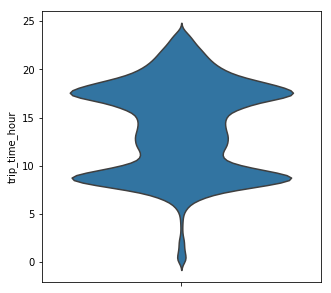

In [18]:
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(figsize = (5,5))
sb.violinplot(data = tripdata, y='trip_time_hour', inner=None);


Now we separate the weekends from the weekdays :

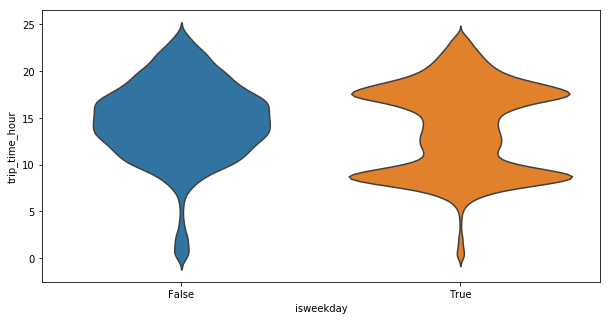

In [19]:
base_color = sb.color_palette()[1]
fig, ax = plt.subplots(figsize = (10,5))
sb.violinplot(data = tripdata, x='isweekday', y='trip_time_hour', inner=None);

The trip times are clearly depending on wether it is a weekday or not : we can clearly see 2 modes (around the typical rush hours : 8.45am and 5.30pm) during weekdays, and a more continuous distribution around midday during weekends.

### Duration analysis
Now let's analyse the trip duration

There are some unrealistic trip duration (up to 85444 seconds corresponding to almost 24hours). Let's drop the trips with a duration above 2 hours (7200 seconds)

In [20]:
tripdata = tripdata[tripdata.duration_sec < 7200]
tripdata.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,dayofweek,trip_time_hour
count,182700.000000,182504.000000,182700.000000,182700.000000,182504.000000,182700.000000,182700.000000,182700.000000,174608.000000,182700.000000,182700.000000
mean,647.237592,138.612874,37.771210,-122.352585,136.217184,37.771412,-122.352163,4474.689267,1984.808995,2.629912,13.958143
std,554.328539,111.719526,0.099645,0.117147,111.428767,0.099553,0.116721,1663.160982,10.117736,1.813250,4.715623
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000278
25%,324.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3783.000000,1980.000000,1.000000,9.390000
50%,513.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.397437,4958.000000,1987.000000,3.000000,14.492639
75%,791.000000,239.000000,37.797280,-122.285633,235.000000,37.797320,-122.288045,5502.000000,1992.000000,4.000000,17.825000
max,7174.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,6.000000,23.999444


We still have 182700 trips, so 99.61% of the initial scope

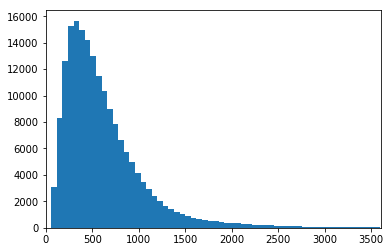

In [21]:
bins = np.arange(0, tripdata['duration_sec'].max()+1, 60)
plt.hist(data = tripdata, x = 'duration_sec', bins = bins);
plt.xlim(0, 3600);

The distribution looks tailed to the right : let's look at the log-scaled histogram :

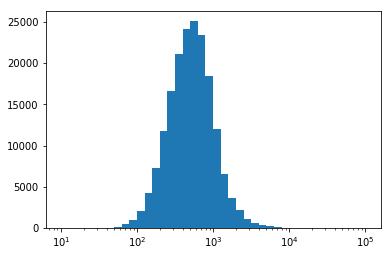

In [22]:
bins = 10**np.arange(1, 5+0.1, 0.1)

plt.hist(data = tripdata, x = 'duration_sec', bins = bins);
plt.xscale('log');



the duration seems to follow a log-normal distribution. In order to find the parameters of the distribution we need to calculate the log-scaled durations 

In [23]:
tripdata['duration_sec_log'] = np.log10(tripdata['duration_sec'])

2.7068120569 0.295120666038


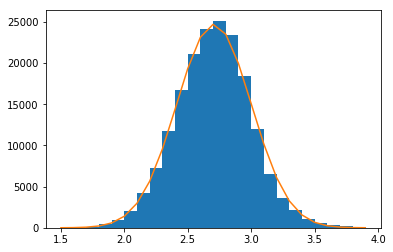

In [24]:
bin_size = 0.1
bins = np.arange(1.5, 4, 0.1)
plt.hist(data = tripdata, x = 'duration_sec_log', bins = bins);

samp_mean = tripdata['duration_sec_log'].mean()
samp_sd = tripdata['duration_sec_log'].std()

print(samp_mean, samp_sd)

from scipy.stats import norm

x = bins
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= tripdata.duration_sec_log.count() * bin_size # 

plt.plot(x, y);


can we use the same distribution for both weekdays and weekends ? let's do the same steps but for weekdays only and weekends only :


2.70343894658 0.289802539694
2.74349011029 0.345629012582


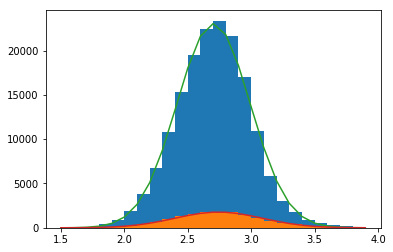

In [25]:
tripdata_weekdays = tripdata[tripdata.isweekday]
tripdata_weekends = tripdata[~tripdata.isweekday]

bin_size = 0.1
bins = np.arange(1.5, 4, 0.1)
plt.hist(data = tripdata_weekdays, x = 'duration_sec_log', bins = bins);
plt.hist(data = tripdata_weekends, x = 'duration_sec_log', bins = bins);

samp_mean_wd = tripdata_weekdays['duration_sec_log'].mean()
samp_sd_wd = tripdata_weekdays['duration_sec_log'].std()
samp_mean_we = tripdata_weekends['duration_sec_log'].mean()
samp_sd_we = tripdata_weekends['duration_sec_log'].std()

print(samp_mean_wd, samp_sd_wd)
print(samp_mean_we, samp_sd_we)

from scipy.stats import norm

x = bins
y_wd = norm.pdf(x, samp_mean_wd, samp_sd_wd) # normal distribution heights
y_we = norm.pdf(x, samp_mean_we, samp_sd_we) # normal distribution heights
y_wd *= tripdata_weekdays.duration_sec_log.count() * bin_size # 
y_we *= tripdata_weekends.duration_sec_log.count() * bin_size # 

plt.plot(x, y_wd);
plt.plot(x, y_we);


Not much difference according to the day of the week, we will use the mean and the standard deviation of the total sample to modelise the duration of a trip

## Bivariate charts

### How many bikes in use

Now we try to combine the results we get from the time of the trip and the duration of the trip in order to evaluate the number of bikes in use (and inderectly how many bikes are free)

According to what we got from the previous results, we can estimate the duration of a trip with the following results (let swith to hour instead of seconds) :


In [26]:
duration_mean = 10 ** samp_mean / 3600
duration_sd = 10 ** samp_sd / 3600
duration_min = 10 ** (samp_mean - 1.645 * samp_sd) / 3600
duration_max = 10 ** (samp_mean + 1.645 * samp_sd) / 3600

print(duration_min, duration_mean, duration_max)

0.0462419415589 0.141419584244 0.432496952624


If we want to estimate how many bikes are in use, we have all the data needed. We just need to compute the total of trips over an estimated duration of the trip ! We will do so using the 3 bin sizes from the 3 different scenario for the duration : duration_min, duration_mean and duration_max 

In [27]:
bin_edges_mean = np.arange(0, 24+duration_mean, duration_mean)
bin_centers_mean = bin_edges_mean[:-1] + duration_mean/2

bin_edges_min = np.arange(0, 24+duration_min, duration_min)
bin_centers_min = bin_edges_min[:-1] + duration_min/2

bin_edges_max = np.arange(0, 24+duration_max, duration_max)
bin_centers_max = bin_edges_max[:-1] + duration_max/2


We know that the results will vary depending on the day of the week, so we will create a function with a parameter = the portion of dataframe we want to use

In [28]:
def bikes_in_use(df):
    displ_binned_mean = pd.cut(df['trip_time_hour'], bin_edges_mean, include_lowest = True)
    displ_binned_min = pd.cut(df['trip_time_hour'], bin_edges_min, include_lowest = True)
    displ_binned_max = pd.cut(df['trip_time_hour'], bin_edges_max, include_lowest = True)

    #need to know the number of days to get the numbers per day :
    n_days = df['trip_date'].nunique()

    comb_mean = df['trip_time_hour'].groupby(displ_binned_mean).count()/n_days
    comb_min = df['trip_time_hour'].groupby(displ_binned_min).count()/n_days
    comb_max = df['trip_time_hour'].groupby(displ_binned_max).count()/n_days

    
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.plot(bin_centers_mean, comb_mean, bar_width, alpha=opacity, color='b', label='Mean');
    rects2 = plt.plot(bin_centers_min, comb_min, bar_width, alpha=opacity, color='g', label='Min');
    rects3 = plt.plot(bin_centers_max, comb_max, bar_width, alpha=opacity, color='r', label='Max');

    plt.xlabel('Time of day');
    plt.title('Number of bikes in use');

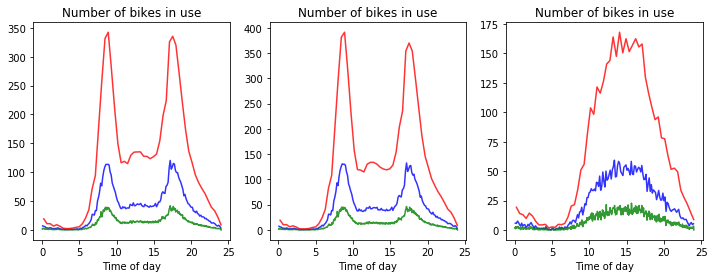

In [29]:
fig, ax = plt.subplots(figsize = (12,4), ncols = 3);
plt.subplot(1, 3, 1)
bikes_in_use(tripdata)
plt.subplot(1, 3, 2)
bikes_in_use(tripdata[tripdata.isweekday])
plt.subplot(1, 3, 3)
bikes_in_use(tripdata[~tripdata.isweekday])

Based on these estimations, and taking into account more data about each station (which one is the most used, how many bikes per station, etc..) we could try to estimate the probability to find a bike or not and wether there should be more or less bikes in circulation

## Multivariate charts

Who's the fastest ? we try to analyse the duration of the trips with a combination of other aspects of the data : user type, gender and the day of week for example

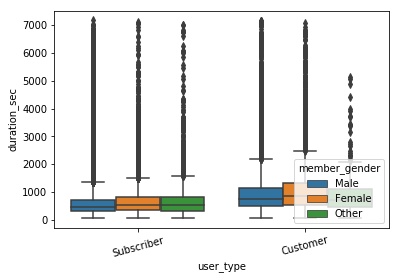

In [30]:

sb.boxplot(data = tripdata, x = 'user_type', y = 'duration_sec', hue = 'member_gender');
plt.xticks(rotation = 15);



The male subscribers seems to be the fastest

Another question : what are the main used stations ?

Another question : what are the main used stations ? start station and end station
Let's find out, and then use a scatterplot with the coordinates to represent this stations, and the size of the plot representing the number of trips in the dataset :

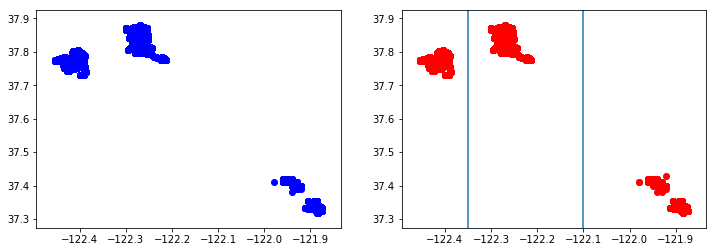

In [31]:
#trip_stats = tripdata.groupby(['start_station_id', 'end_station_id']).size()
fig, ax = plt.subplots(figsize = (12,4), ncols = 2);
plt.subplot(1, 2, 1)
plt.scatter(data = tripdata, x = 'start_station_longitude', y = 'start_station_latitude', color = 'b');
plt.subplot(1, 2, 2)
plt.scatter(data = tripdata, x = 'end_station_longitude', y = 'end_station_latitude', color = 'r');
plt.axvline(-122.35)
plt.axvline(-122.1)


In [32]:
trip_1 = tripdata[(tripdata.start_station_longitude < -122.35) & (tripdata.end_station_longitude < -122.35)]
trip_2 = tripdata[(tripdata.start_station_longitude > -122.35) & (tripdata.start_station_longitude < -122.1) & (tripdata.end_station_longitude > -122.35) & (tripdata.end_station_longitude < -122.1)]
trip_3 = tripdata[(tripdata.start_station_longitude > -122.1) & (tripdata.end_station_longitude > -122.1)]

In [33]:
print(trip_1.start_station_id.nunique())
print(trip_2.start_station_id.nunique())
print(trip_3.start_station_id.nunique())

156
127
46


We now want to know which one are the main used in the mornings vs the afternoons, so we need to separate our data into 2 separate sets :

In [57]:
trip_1_m = trip_1[(trip_1.trip_time_hour<12) & (trip_1.isweekday)]
trip_1_a = trip_1[(trip_1.trip_time_hour>=12) & (trip_1.isweekday)]
trip_2_m = trip_2[(trip_2.trip_time_hour<12) & (trip_2.isweekday)]
trip_2_a = trip_2[(trip_2.trip_time_hour>=12) & (trip_2.isweekday)]
trip_3_m = trip_3[(trip_3.trip_time_hour<12) & (trip_3.isweekday)]
trip_3_a = trip_3[(trip_3.trip_time_hour>=12) & (trip_3.isweekday)]

In [58]:
def station_map(df):
    fig, ax = plt.subplots(figsize = (12,4), ncols = 2);
    plt.subplot(1, 2, 1)
    sb.regplot(data = df, x = 'start_station_longitude', y = 'start_station_latitude', x_jitter=0.0001, y_jitter = 0.0001, scatter_kws={'alpha':100/df.shape[0]}, fit_reg=False);
    plt.xlim(df.start_station_longitude.min()-0.01, df.start_station_longitude.max()+0.01)
    plt.ylim(df.start_station_latitude.min()-0.01, df.start_station_latitude.max()+0.01)
    plt.subplot(1, 2, 2)
    sb.regplot(data = df, x = 'end_station_longitude', y = 'end_station_latitude', x_jitter=0.0001, y_jitter = 0.0001, scatter_kws={'alpha':100/df.shape[0]}, fit_reg=False);
    plt.xlim(df.end_station_longitude.min()-0.01, df.end_station_longitude.max()+0.01)
    plt.ylim(df.end_station_latitude.min()-0.01, df.end_station_latitude.max()+0.01)
    

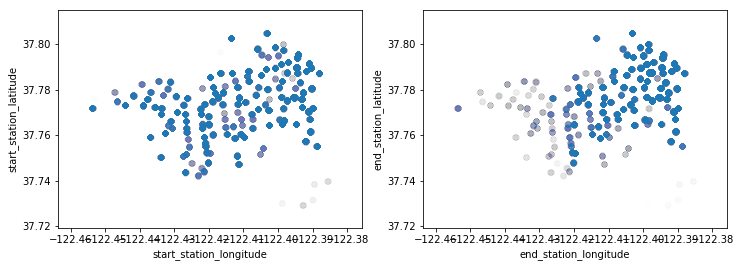

In [59]:
station_map(trip_1_m);

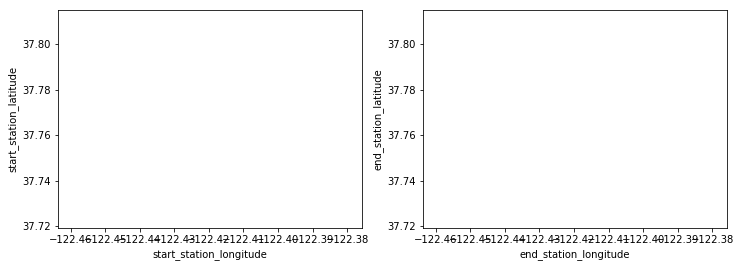

In [60]:
station_map(trip_1_a);

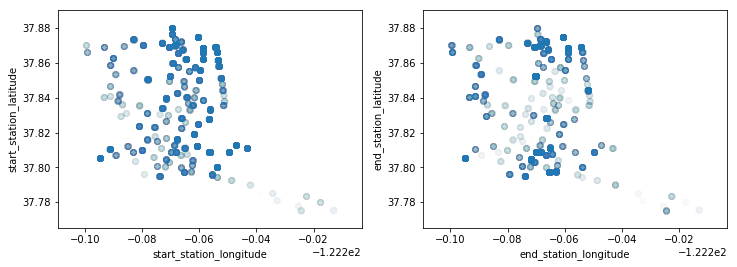

In [61]:
station_map(trip_2_m);

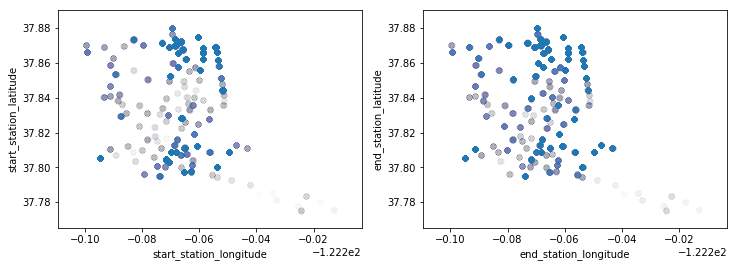

In [62]:
station_map(trip_2_a);

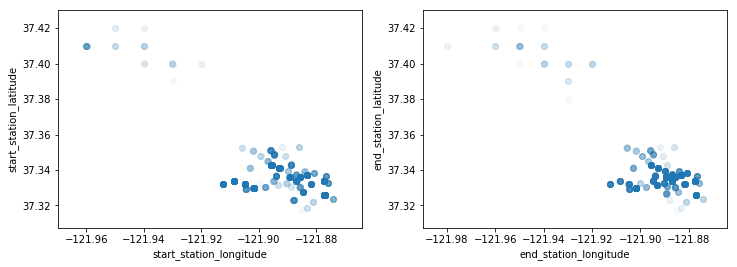

In [63]:
station_map(trip_3_m);

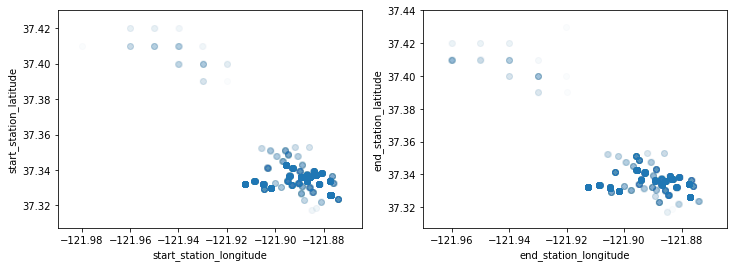

In [56]:
station_map(trip_3_a);

In [84]:
def station_frequency(df):
    df2 = pd.crosstab(df['start_station_id'], df['end_station_id']).div(len(df))
    sb.heatmap(df2, annot=False, vmin = 0.01, cmap = 'Greens')

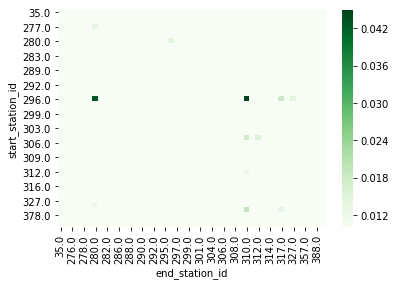

In [87]:
station_frequency(trip_3_m);

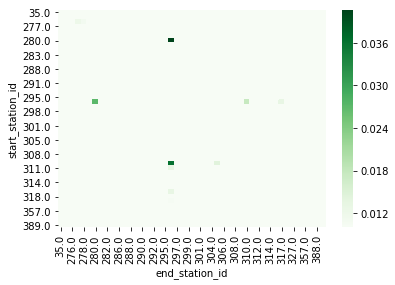

In [88]:
station_frequency(trip_3_a);